#Setup

Loads necessary libraries and data

In [ ]:
import matplotlib.pyplot as plt
import squarify
import numpy as np
import pandas as pd
from google.colab import drive
plt.style.use('fivethirtyeight')

In [ ]:
#Mounts your google drive to colab
drive.mount('/content/drive')

#Change path accordingly
path = '/content/drive/My Drive/g-research-crypto-forecasting'
os.chdir(path)

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


timestamp - A timestamp for the minute covered by the row.

Asset_ID - An ID code for the cryptoasset.

Count - The number of trades that took place this minute.

Open - The USD price at the beginning of the minute.

High - The highest USD price during the minute.

Low - The lowest USD price during the minute.

Close - The USD price at the end of the minute.

Volume - The number of cryptoasset units traded during the minute.

In [ ]:
#Assigns each variable to its respective asset
bin = train[train["Asset_ID"]==0].set_index("timestamp")  #Binance
btc = train[train["Asset_ID"]==1].set_index("timestamp")  #Bitcoin
btcC = train[train["Asset_ID"]==2].set_index("timestamp") #Bitcoin Cash
ada = train[train["Asset_ID"]==3].set_index("timestamp")  #Cardano
doge = train[train["Asset_ID"]==4].set_index("timestamp") #DogeCoin
eos = train[train["Asset_ID"]==5].set_index("timestamp")  #Eos
eth = train[train["Asset_ID"]==6].set_index("timestamp")  #Etherium
ethC = train[train["Asset_ID"]==7].set_index("timestamp") #Etherium Classic
iota = train[train["Asset_ID"]==8].set_index("timestamp") #iota
lite = train[train["Asset_ID"]==9].set_index("timestamp") #Litecoin
mkr = train[train["Asset_ID"]==10].set_index("timestamp") #Maker
mon = train[train["Asset_ID"]==11].set_index("timestamp") #Monero
ste = train[train["Asset_ID"]==12].set_index("timestamp") #Stellar
tron = train[train["Asset_ID"]==13].set_index("timestamp")#Tron

In [ ]:
asset_list = [btc, eth, bin, btcC, ada, doge, eos, ethC, iota, lite, mkr, mon, ste, tron]

In [ ]:
asset_names = ["Bitcoin", "Ethereum", "Binance", "Bitcoin Cash", "Cardano", "DodgeCoin",
               "Eos", "Ethereum Classic", "Iota", "LiteCoin", "Maker",
               "Monero", "Stellar", "Tron"]

In [ ]:
asset_names_abr = ["BTC", "Eth", "Bin", "BtcC", "Ada", "Doge",
               "Eos", "EthC", "Iota", "Lite", "Mkr",
               "Mon", "Ste", "Tron"]

#Data Cleaning

## Fixing timeframe missing values

In [ ]:
#Check to see if the interval between each timestamp is 60 seconds
print((eth.index[1:]-eth.index[:-1]).value_counts().head())
print((btc.index[1:]-btc.index[:-1]).value_counts().head())

60     1956043
120        100
180         23
300          5
540          4
Name: timestamp, dtype: int64
60     1956136
120         78
180         12
240         11
420          9
Name: timestamp, dtype: int64


The other values above mean that there is minute data missing.
Since the intervals are relatively short (540 seconds), we can fix the missing data by replacing with previous minute data.

In [ ]:
#Deals with intervals were price data is missing
bin = bin.reindex(range(bin.index[0],bin.index[-1]+60,60),method = 'pad')
btc = btc.reindex(range(btc.index[0],btc.index[-1]+60,60),method = 'pad')
btcC = btcC.reindex(range(btcC.index[0],btcC.index[-1]+60,60),method = 'pad')
eos = eos.reindex(range(eos.index[0],eos.index[-1]+60,60),method = 'pad')
eth = eth.reindex(range(eth.index[0],eth.index[-1]+60,60),method = 'pad')
ethC = ethC.reindex(range(ethC.index[0],ethC.index[-1]+60,60),method = 'pad')
lite = lite.reindex(range(lite.index[0],lite.index[-1]+60,60),method = 'pad')
mon = mon.reindex(range(mon.index[0],mon.index[-1]+60,60),method = 'pad')
ste = ste.reindex(range(ste.index[0],ste.index[-1]+60,60),method = 'pad')
tron = tron.reindex(range(tron.index[0],tron.index[-1]+60,60),method = 'pad')

## Fixing NA values

In [ ]:
#Check how many values are missing per column
btc.isna().sum()

Asset_ID      0
Count         0
Open          0
High          0
Low           0
Close         0
Volume        0
VWAP          0
Target      937
dtype: int64

In [ ]:
#Since the target column has few missing values, and because the data 
#is given in minutes, we can use ffill to fill the missing values with previous values
btc = btc.fillna(method='ffill')
bin = bin.fillna(method='ffill')
btcC = btcC.fillna(method='ffill')
eos = eos.fillna(method='ffill')
eth = eth.fillna(method='ffill')
ethC = ethC.fillna(method='ffill')
lite = lite.fillna(method='ffill')
mon = mon.fillna(method='ffill')
ste = ste.fillna(method='ffill')
tron = tron.fillna(method='ffill')

# Data Visualization

##Overlapped normalized line plot

This plot will be used to analyze the trend of the given assests and how they compare to each other

In [ ]:
def normalize(data):
  return (np.array(data/max(data), dtype='float'))

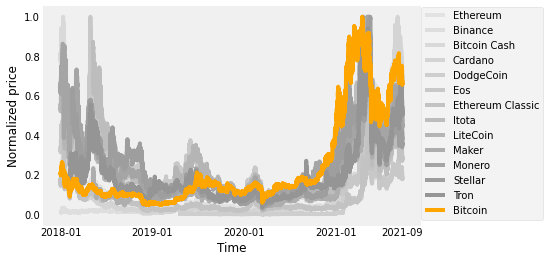

In [ ]:
f = plt.figure(figsize = (6,4))

#Creates a list of colors with grey shading
greys= plt.get_cmap('Greys')
colors = iter(greys(np.linspace(0.2,0.5,13)))

#Creates arrays with the dates and its specific timestamp
#The date to timestamp calculator can be found at:
dates = ['2018-01', '2019-01', '2020-01', '2021-01', '2021-09']
ticks = [1514764860, 1546300800, 1577836800, 1609459200, 1632182400]

#Plots the normalized price trend of each coin

counter = 1
for i in asset_list[1:]:
  plt.plot(i.index, normalize(i['Close']), c = next(colors), 
           label = asset_names[counter])
  counter += 1

plt.xticks(ticks, dates)
plt.plot(btc.index, normalize(btc['Close']), c = 'Orange', label = "Bitcoin")
plt.legend(bbox_to_anchor=(1.33, 1), loc='upper right', borderaxespad=0)
plt.xlabel('Time')
plt.ylabel('Normalized price')
plt.grid(False)
plt.show()
f.clear()
plt.close(f)


##Trade count barplot

This barplot will be used to analyze how much each coin was used between 2018 and 2021.

In [ ]:
#Creates an array with the sum of all total trades for each asset
total_trades = []

for i in asset_list:
  total_trades.append(np.sum(i['Count']))

print(total_trades)

[2117460311.0, 1348034155.0, 362195877.0, 299985406.0, 428883115.0, 549295778.0, 480125009.0, 252805308.0, 53310868.0, 441414221.0, 33485351.0, 59209021.0, 211747363.0, 304907865.0]


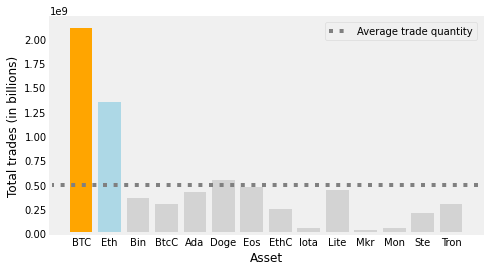

In [ ]:
fig = plt.figure(figsize = (6, 3))
ax = fig.add_axes([0, 0, 1, 1])

#Creates a list of colors to be used in the barplot
colors = ['orange', 'lightblue']
for i in range(0, 12):
  colors.append('lightgray')

#Plots the data
ax.bar(asset_names_abr, total_trades, color=colors)
plt.axhline(y=np.average(total_trades), label = 'Average trade quantity', 
            c = 'gray', ls=':')
plt.ylabel('Total trades (in billions)')
plt.xlabel('Asset')
plt.legend()
plt.grid(False)
plt.show()
f.clear()
plt.close(f)

## Variance analysis

We will use this plot to evaluate the average daily variance of each coin

In [ ]:
#This function allows us to get the average daily variance of a given coin
def get_average_variance(data):
  daily_variance = []

  for i in range(0, len(data)-1440, 1440):
    daily_variance.append(
        (abs(data.iloc[i, 2]-data.iloc[i+1440, 2])/
          data.iloc[i+1440, 2])*100)

  return np.average(daily_variance)

In [ ]:
#Gets daily average variance (in %) from all coins
asset_variance = []
for i in asset_list:
  asset_variance.append(get_average_variance(i))

print(asset_variance)

[2.759600443210316, 3.645269848991199, 3.9839425807872173, 4.277398118966898, 4.128198957779409, 4.436505836082446, 4.4366007260889555, 4.400857076656494, 4.463647384041385, 3.847578098213943, 6.01796644821328, 4.191158031473606, 4.197512158124911, 4.305490406962645]


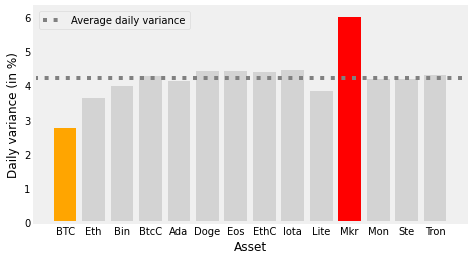

In [ ]:
fig = plt.figure(figsize = (6, 3))
ax = fig.add_axes([0, 0, 1, 1])

#Creates color map for the plot
#Manually color the relevant assets
colors = ['orange', 'lightgrey']
for i in range(0, 12):
  if i == 8:
    colors.append('red')
  colors.append('lightgray')

#Plots data
ax.bar(asset_names_abr, asset_variance, color=colors)
plt.axhline(y=np.average(asset_variance), label = 'Average daily variance', 
            c = 'gray', ls=':')
plt.ylabel('Daily variance (in %)')
plt.xlabel('Asset')
plt.legend()
plt.grid(False)
plt.show()
f.clear()
plt.close(f)

## Total Money Traded

We will use this plot to see how much money was traded through each coin

In [ ]:
#By multiplying volume (amount of coins traded) and price,
#we can get how much money was traded with a given coin
def get_total_transaction_values(data):

  total_money = (np.sum(
        data['Open'] * data['Volume']))

  return total_money

In [ ]:
#Creates a list of money traded per coin
total_money = []
for i in asset_list:
  total_money.append(get_total_transaction_values(i))
print(total_money)

[3038320398082.8027, 1772282616255.9211, 324145669799.33716, 197784187666.82733, 317978287597.39154, 431509394294.67944, 266774854589.7943, 144362153952.3956, 18330269878.79963, 289833449294.0008, 12303411372.832714, 25213519254.48637, 95147528755.9824, 146575545350.26575]


In [ ]:
#Since Bitcoin and Ethereum were the coins that traded the most,
#we can group the remaining coins to make a less cluttered visualization.
total = []
total.append(total_money[0])
total.append(total_money[1])
total.append(sum(total_money[2:]))
print(total)

[3038320398082.8027, 1772282616255.9211, 2269958271806.793]


(0.0, 100.0, 0.0, 100.0)

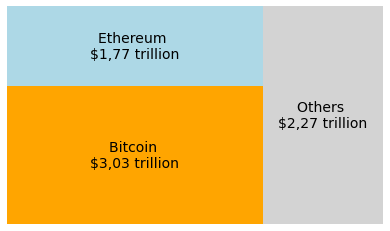

In [ ]:
#Plots area graph of the data
plt.rc('font', size=14)
squarify.plot(sizes=total, 
              label=['Bitcoin \n$3,03 trillion', 'Ethereum \n$1,77 trillion', 'Others \n$2,27 trillion'], 
              color = ['Orange', 'Lightblue', 'Lightgray'])
plt.axis('off')
plt.show()

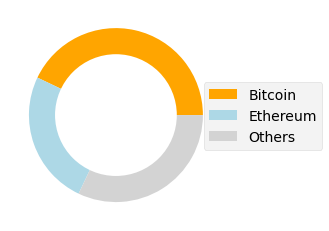

In [ ]:
#Plots donut graph of the data
colors = ['orange', 'lightblue']
for i in range(0, 12):
  colors.append('lightgray')

total = []
total.append(total_money[0])
total.append(total_money[1])
total.append(sum(total_money[2:]))

plt.pie(total,  colors = colors)
plt.legend(labels=["Bitcoin", "Ethereum", "Others"], loc='upper right')
plt.legend(bbox_to_anchor=(1.45, .65), loc='upper right', 
           borderaxespad=0, labels=["Bitcoin", "Ethereum", "Others"])
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.show()

In [ ]:
#Gets how much money was traded through crypto in total.
print(f'{sum(total_money):,}')

7,080,561,286,145.517


## Usage growth between 2018 and 2020



In [ ]:
def get_count_sum_2018(data):
  #date at 2019/01/01, 8:00:00 PM
  df = data.loc[data.index < 1546390800]
  return np.sum(df['Count'])

In [ ]:
def get_count_sum_2020(data):
  # date at 2021/01/01, 8:00:00 PM and at #date at 2019/01/01, 8:00:00 PM
  df = data.loc[(data.index < 1609549200) & (data.index > 1546390800)]
  return np.sum(df['Count'])

In [ ]:
count_2018 = []

for i in asset_list:
  count_2018.append(get_count_sum_2018(i))

print(count_2018)

[192784623.0, 132050562.0, 15240390.0, 30369554.0, 13429048.0, 0.0, 54485945.0, 20585639.0, 5121515.0, 45862855.0, 12571.0, 2915007.0, 5799714.0, 11948778.0]


In [ ]:
count_2020 = []

for i in asset_list:
  count_2020.append(get_count_sum_2020(i))

print(count_2020)

[885591967.0, 437179444.0, 76790131.0, 133310278.0, 75627154.0, 9911974.0, 199061591.0, 71499176.0, 11909674.0, 153378294.0, 5084517.0, 19928969.0, 57538866.0, 101091405.0]


In [ ]:
percent_difference = {}

for i in range(len(count_2020)):

  percent_difference[asset_names[i]] = (
        ((count_2020[i]-count_2018[i]) /count_2020[i])*100)

{'Iota': 56.997017718537045, 'Eth': 69.79488312812805, 'Lite': 70.0982102460991, 'EthC': 71.20856469730505, 'Eos': 72.62859965788176, 'BtcC': 77.2188953052817, 'BTC': 78.23098783821737, 'Bin': 80.1531918209646, 'Ada': 82.24308692086973, 'Mon': 85.37301653688156, 'Tron': 88.18022363028786, 'Ste': 89.92035400906234, 'Mkr': 99.7527592099702, 'Doge': 100.0}


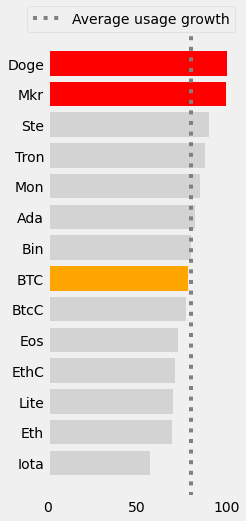

In [ ]:
colors = []

for i in range(14):
  if i == 6:
    colors.append('orange')
  elif i == 12 or i == 13:
    colors.append('red')
  else:
    colors.append('lightgray')

fig = plt.figure(figsize = (3, 8))
percent_difference = dict(sorted(percent_difference.items(), key=lambda x:x[1]))
print(percent_difference)
plt.barh(list(percent_difference.keys()), list(percent_difference.values()), color=colors)
plt.axvline(x=np.average(list(percent_difference.values())), label = 'Average usage growth', c = 'gray', ls=':')
plt.legend(bbox_to_anchor=(1, 1.05), loc='upper right', borderaxespad=0)
plt.grid(False)
plt.show()